# Spotify 

Your task is to analyse the data given to you and explore predictive tasks that could provide the company with insight on some burning questions such as:

1. What drives cross-regional popularity of music; is it the artist, or something about the song?(explore if artists from certain parts of the world tend to be more popular worldwide)
2. Can we figure out which artists or genres are going to be popular in 2024 given the historic data from 2017?
3. Does the popularity of a track in one region predict its (upcoming?) popularity in other regions?
4. Are there any patterns in what day(s) of the week and/or months experience the most streams?

1. Who are the most popular artists (say top 10)?
2. Who was the most popular each month?
3. Name the songs people dance to the most?
4. Is there a relationship between danceability and energy or loundness of the music?
5. Does a total number of artists affect the popularity of a song?
5. If it does, then can we predict if more artists would make a song more popular
6. How does valency affect the popularity of a song. (A high valence song is about happiness, excitement and joy, whereas a low valence song is about sadness, anger or depression.
7. Check the mean value of audio features of top 10 songs. Can we predict popularity of songs if they have greater value than the mean value for those features?


1. EDA for each feature
2. Release date and popularity date

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pandas as pd
from sklearn.cluster import SpectralClustering
import numpy as np
import collections

In [117]:
# Importing the data using pd.read_csv
data = pd.read_csv(r'~/anaconda3/Anjali-Spotify/Spotify_Dataset_V3.csv',sep=';')

In [5]:
len(data["Title"].unique())

7457

In [6]:
# Checking the data head - a glimpse of the data
data.head();

In [7]:
# Getting information about each column of the data 
# Checking for null values and data types
# Checking the shape of the data - 651936x20
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

### Data Cleaning and Pre-Processing

In [8]:
# Checking for duplicates
data[data.duplicated()];
# No duplicates found

Genres to consider:

don't care about the artist, title, date, rank and number of artists. I don't think these would have a meaningful connection with the genre.

Danceability-Energy-Loudness-Speechiness-Acousticness-Instrumentalness-Valence

_Rock_ - LessDanceable-ModeratelyEnergetic-ModeratelyLoud-ModeratelySpeechy-MoreAcoustic-HighlyInstrumental-ModeratelyValent

_Jazz_ - LessDanceable-LessEnergetic-ModeratelyLoud-LessSpeechy-ModeratelyAcoustic-HighlyInstrumental-ModeratelyValent

_Sad_ - LessDanceable-LessEnergetic-LessLoud-ModeratelySpeechy-LessAcoustic-LessInstrumental-LowValency

_Elec_ - VeryDanceable-VeryEnergetic-VeryLoud-ModerateToHighSpeech-MoreAcoustic-HighlyInstrumental-HighValencey

_Rap_ - ModeratelyDanceable-VeryEnergetic-ModeratelyLoud-VerySpeechy-MoreAcoustic-ModeratelyInstrumental-ModerateValency

In [9]:
data['Loudness'].describe()

count    651936.000000
mean      -5295.645217
std        2785.261321
min      -34475.000000
25%       -6825.000000
50%       -5206.000000
75%       -3885.000000
max        1509.000000
Name: Loudness, dtype: float64

In [10]:
column = 'Loudness'
data[column] = (data[column]-data[column].min())/(data[column].max() - data[column].min())

In [11]:
data.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,0.810898,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,0.077403,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,0.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,0.768397,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,0.813389,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,0.850100,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


In [12]:
#Unable to use the "Instrumentalness" column because most values are 0
edm_condition = (
    (data['Danceability'] >= 0.49) &
    (data['Energy'] >= 0.5) &
    (data['Loudness'] >= 0.6) &
    (data['Valence'] >= 0.25))

hip_hop_condition = (
    (data['Danceability'] >= 0.5) &
    (data['Energy'] < 0.7) &
    (data['Loudness'] >= 0.5) &
    (data['Speechiness'] >= 0.07))

rap_condition = (
    (data['Speechiness'] >= 0.3))

pop_condition = (
    (data['Danceability'] < 0.7) &
    (data['Loudness'] >= 0.4))

rb_condition = (
    (data['Loudness'] >= 0.75) &
    (data['Speechiness'] >= 0.1))

latin_condition = (
    (data['Nationality'].str.contains('Brazil|Colombia|Dominican Republic|Puerto Rico')))

# Create a 'Genre' column based on the conditions
data['Genre'] = 'Other'  # Default to 'Other' genre
data.loc[edm_condition, 'Genre'] = 'EDM'
data.loc[hip_hop_condition, 'Genre'] = 'Hip-Hop'
data.loc[rap_condition, 'Genre'] = 'Rap'
data.loc[pop_condition, 'Genre'] = 'Pop'
data.loc[rb_condition, 'Genre'] = 'R&B'
data.loc[latin_condition, 'Genre'] = 'Latin'

In [13]:
len(data[data["Genre"]=="Pop"]["Title"].unique())

2810

In [14]:
len(data[data["Genre"]=="EDM"]["Title"].unique())

992

In [15]:
len(data[data["Genre"]=="Hip-Hop"]["Title"].unique())

553

In [16]:
len(data[data["Genre"]=="Rap"]["Title"].unique())

170

In [17]:
len(data[data["Genre"]=="Latin"]["Title"].unique())

901

In [18]:
len(data[data["Genre"]=="R&B"]["Title"].unique())

2247

In [19]:
# Removing the '# artists', 'Artist (Ind.)', '# nationality', 'Nationality',
# 'Points (Ind for each Artist/Nat)' and 'Continent', 'id' and 'song url','Points' columns 
# to get a single entry for each song. 

# We are removing the number of artists rows because it creates partial duplicated rows
# which might affect the result.
data_wt_art = data.drop(columns=['# of Artist','Artist (Ind.)','# of Nationality',
                                'Nationality','Continent','id','Song URL',
                                'Points (Ind for each Artist/Nat)'])

data_wt_art = data_wt_art.drop_duplicates(keep='first')
data_wt_art = data_wt_art.reset_index(drop=True)

### Exploratory Data Analysis and Visualization

- `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy` : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- `speechiness` : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- `acousticness` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `instrumentalness` : Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.

**Correlation between audio features**

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
Danceability,1.000000,0.130000,0.170000,0.200000,-0.240000,-0.060000,0.390000
Energy,0.130000,1.000000,0.550000,-0.010000,-0.540000,-0.080000,0.410000
Loudness,0.170000,0.550000,1.000000,-0.050000,-0.300000,-0.160000,0.270000
Speechiness,0.200000,-0.010000,-0.050000,1.000000,-0.060000,-0.020000,0.010000
Acousticness,-0.240000,-0.540000,-0.300000,-0.060000,1.000000,0.050000,-0.120000
Instrumentalness,-0.060000,-0.080000,-0.160000,-0.020000,0.050000,1.000000,-0.110000
Valence,0.390000,0.410000,0.270000,0.010000,-0.120000,-0.110000,1.000000


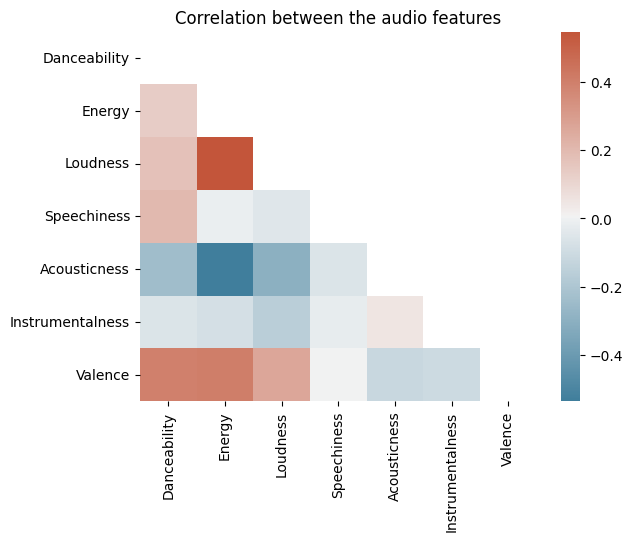

In [20]:
corr = data_wt_art[['Danceability','Energy','Loudness','Speechiness','Acousticness', 
                 'Instrumentalness','Valence']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.title('Correlation between the audio features')
sns.heatmap(corr,cmap=cmap,mask=mask);

corr = data_wt_art[['Danceability', 
                  'Energy', 
                  'Loudness', 
                  'Speechiness', 
                  'Acousticness', 
                  'Instrumentalness',
                  'Valence']].corr()
corr = round(corr,2)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr.style.background_gradient(cmap=cmap)

Here, we can observe that
1. Danceability ~ + Valence
2. Energy ~ + Loudness
3. Energy ~ - Acousticness
4. Energy ~ + Valence
5. Loudness ~ - Acousticness
6. Loudness ~ + Valence

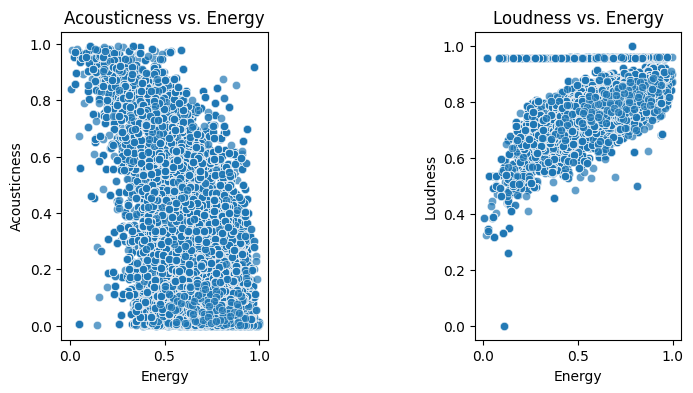

In [21]:
x1_feature = 'Energy'
y1_feature = 'Acousticness'

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.scatterplot(x=x1_feature, y=y1_feature, data=data_wt_art, alpha=0.7)
plt.xlabel(x1_feature)
plt.ylabel(y1_feature)
plt.title(f'{y1_feature} vs. {x1_feature}')

x2_feature = 'Energy'
y2_feature = 'Loudness'

plt.subplot(1,2,2)
sns.scatterplot(x=x2_feature, y=y2_feature, data=data_wt_art, alpha=0.7)
plt.xlabel(x2_feature)
plt.ylabel(y2_feature)
plt.title(f'{y2_feature} vs. {x2_feature}')

plt.subplots_adjust(wspace=1)
plt.show()

**Percentage of each Genre**

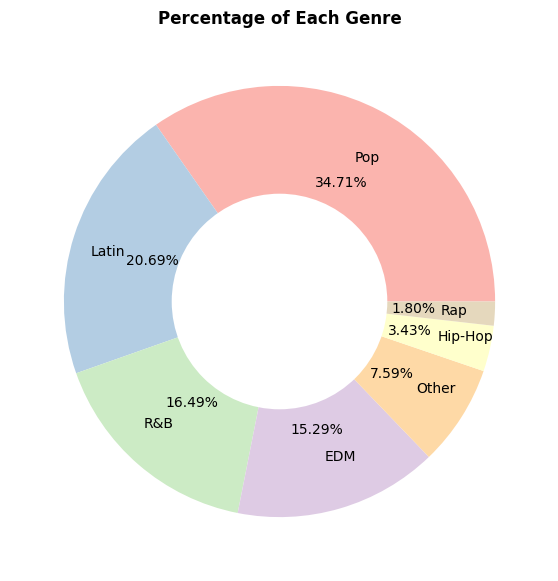

In [22]:
#data_wt_art["Genre"].value_counts().plot(kind="pie")

plt.figure(figsize=(7,7))
plt.pie(
    x=data_wt_art["Genre"].value_counts(), 
    labels=data_wt_art["Genre"].unique(),
    autopct='%1.2f%%',
    labeldistance=0.75,
    pctdistance=0.62,
    colors=sns.color_palette('Pastel1'))

# Add Title 
plt.title(label="Percentage of Each Genre",weight='bold')

hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

### Answering Questions

**What are the most popular songs?**

In [23]:
# Here we get the frequency for each Song being in the top 200 everyday
title_cnt = data_wt_art.groupby('Title').count()
# We find out the 15 most frequently occuring songs in top 200 playlist
title_freq = title_cnt['Rank'].nlargest(15)

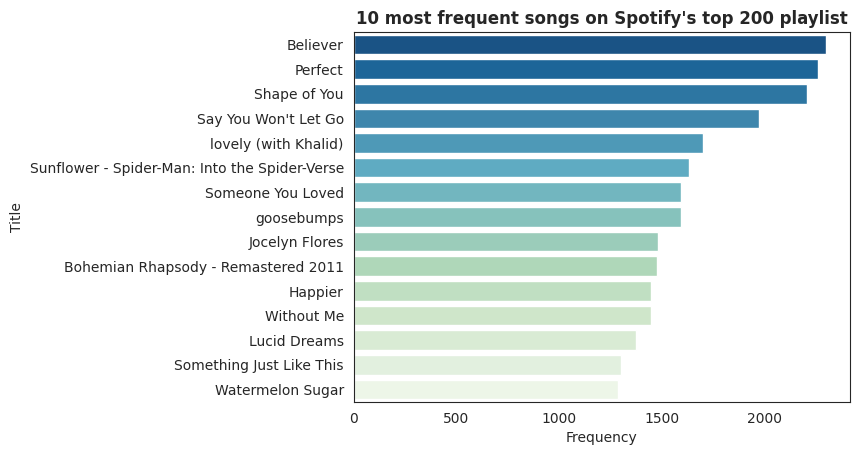

In [24]:
# Plotting these songs with their frequencies

with sns.axes_style('white'):
    plt.title("10 most frequent songs on Spotify's top 200 playlist",weight='bold')
    plt.xlabel("Frequency")
    sns.barplot(x=title_freq.values, y=title_freq.index, palette='GnBu_r');

**Audio Features of one of the most popular songs**

In [25]:
data_wt_art[(data_wt_art["Genre"]=="Rap")&(data_wt_art["Rank"]==2)]['Title'].unique()

array(['Major Distribution', 'WAP (feat. Megan Thee Stallion)', 'bad guy',
       '7 rings', 'bury a friend', 'I Love It (& Lil Pump)',
       'FEFE (feat. Nicki Minaj & Murda Beatz)'], dtype=object)

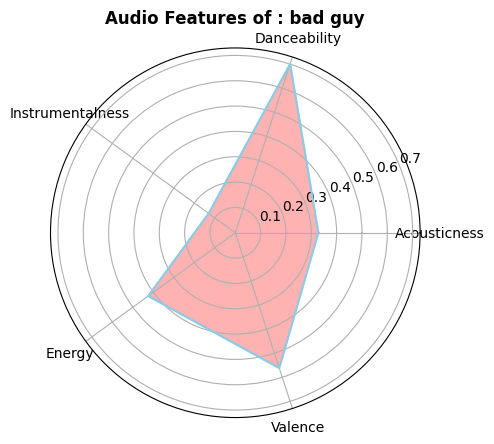

In [26]:
song_name = "bad guy"
labels = np.array(['Acousticness','Danceability','Instrumentalness','Energy','Valence'])
song_data = data_wt_art[data_wt_art["Title"]==song_name].iloc[0:1]
song = song_data.loc[:, labels].values.squeeze()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax=plt.subplot(111, polar=True)
ax.plot(angles, song, linewidth=1.5,color="skyblue")
ax.fill(angles, song, alpha=0.3,color="red")
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Audio Features of : ' + song_name,weight='bold')
ax.grid(True)

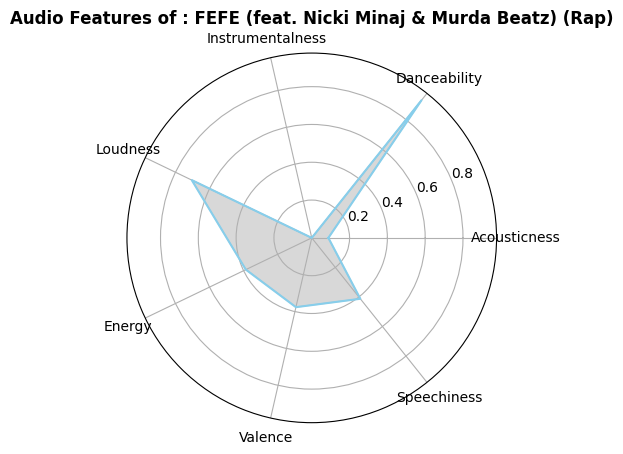

In [27]:
data_wt_art_scaled = data_wt_art.copy()
column = 'Loudness'
data_wt_art_scaled[column] = (data_wt_art_scaled[column]-data_wt_art_scaled[column].min()
                             )/(data_wt_art_scaled[column].max() - data_wt_art_scaled[column].min())
song_name = "FEFE (feat. Nicki Minaj & Murda Beatz)"
song_genre = "Rap"
labels = np.array(['Acousticness','Danceability',
                   'Instrumentalness','Loudness','Energy','Valence','Speechiness'])
song_data = data_wt_art_scaled[data_wt_art_scaled["Title"]==song_name].iloc[0:1]
song = song_data.loc[:, labels].values.squeeze()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax=plt.subplot(111, polar=True)
ax.plot(angles, song, linewidth=1.5,color="skyblue")
ax.fill(angles, song, alpha=0.3,color="grey")
ax.set_thetagrids((angles * 180/np.pi)[0:7], labels)
ax.set_title('Audio Features of : ' + song_name + ' (' +song_genre + ')',weight='bold')
ax.grid(True)

**Songs to which people dance the most**

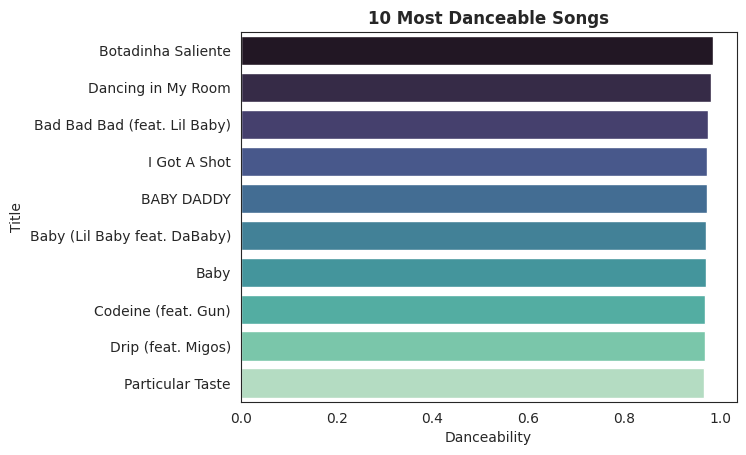

In [28]:
title_max = data_wt_art.groupby('Title').max().reset_index()

most_danceable = title_max.sort_values('Danceability', ascending=False).head(10)

with sns.axes_style('white'):
    plt.title('10 Most Danceable Songs',weight='bold')
    sns.barplot(x=most_danceable.Danceability, y=most_danceable.Title, palette='mako')
    plt.xlabel('Danceability')
    plt.ylabel('Title');

**Song trends over-time**

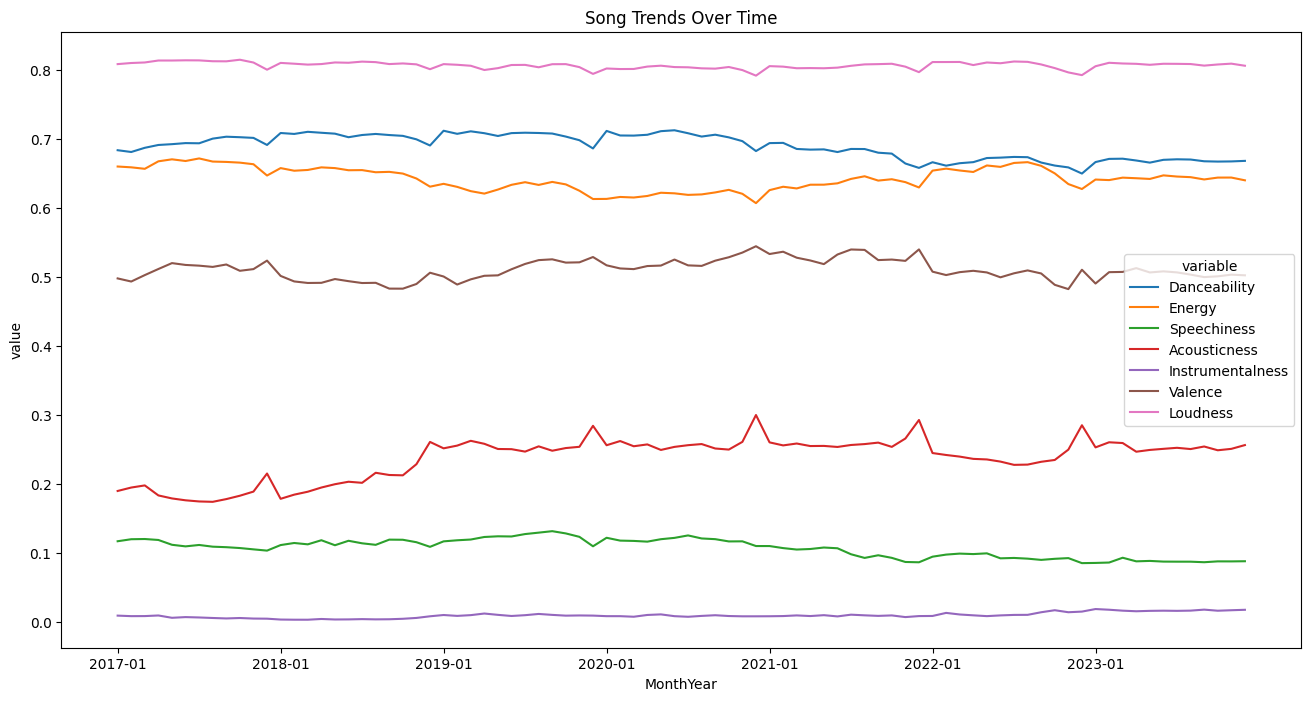

In [29]:
data_wt_art['MonthYear'] = pd.to_datetime(data_wt_art['Date']).dt.to_period('M')
data_wt_art["MonthYear"] = data_wt_art["MonthYear"].astype(str)

date_data = data_wt_art.groupby('MonthYear')[["Danceability", "Energy", "Speechiness",
                                               "Acousticness", "Instrumentalness",
                                               "Valence","Loudness"]].mean().reset_index()

date_data = date_data.melt(id_vars='MonthYear')

plt.figure(figsize=(16, 8))
plt.title('Song Trends Over Time')
sns.lineplot(x='MonthYear', y='value', hue='variable', data=date_data)
plt.xticks(range(0,84,12))
plt.show()


In [47]:
data_wt_art

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Genre,MonthYear
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,0.814223,0.033,0.483,0.000,0.834,200,Pop,2023-05
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,0.846376,0.061,0.143,0.629,0.234,199,Latin,2023-05
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,0.800272,0.333,0.213,0.000,0.559,198,R&B,2023-05
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,0.726517,0.033,0.435,0.000,0.726,197,EDM,2023-05
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,0.844792,0.047,0.228,0.000,0.562,196,Pop,2023-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495150,196,White Iverson,Post Malone,01/01/2017,0.675,0.562,0.744692,0.035,0.233,0.000,0.309,5,Pop,2017-01
495151,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,0.773427,0.068,0.022,0.000,0.377,4,Pop,2017-01
495152,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,0.654930,0.085,0.089,0.004,0.883,3,Pop,2017-01
495153,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,0.797466,0.053,0.016,0.000,0.764,2,Pop,2017-01


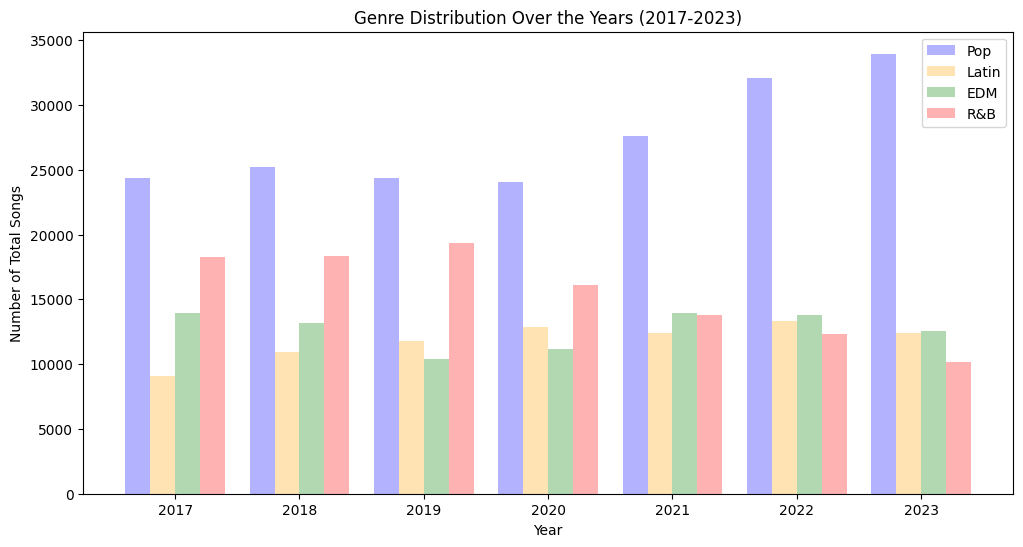

In [62]:
# Extract year from the 'Date' column (assuming it's in datetime format)
data_wt_art['Year'] = pd.to_datetime(data_wt_art['Date']).dt.year

# Create a bar chart for each genre over the years
genres = ['Pop', 'Latin','EDM','R&B']
colors = ['blue', 'orange', 'green','red']

bar_width = 0.2
bar_positions = np.arange(data_wt_art['Year'].min(), data_wt_art['Year'].max() + 1)

plt.figure(figsize=(12, 6))

for i, genre in enumerate(genres):
    genre_data = data_wt_art[data_wt_art['Genre'] == genre]
    genre_counts = genre_data.groupby('Year').size()
    
    # Double the height of bars for the year 2023
    genre_counts.loc[2023] *= 2.4
    
    plt.bar(bar_positions + i * bar_width, genre_counts.values, bar_width, label=genre, color=colors[i], alpha=0.3)
    #plt.bar(genre_counts.index, genre_counts.values, label=genre, color=colors[i], alpha=1)

middle_positions = bar_positions + ((len(genres) - 1) / 2) * (bar_width)
plt.xticks(middle_positions, bar_positions)

plt.xlabel('Year')
plt.ylabel('Number of Total Songs')
plt.title('Genre Distribution Over the Years (2017-2023)')
plt.legend()
plt.show()


We can see from the graph that the number of Pop songs increased year after year from 2020. We can also see that Latin songs started to be ranked in the top 200 playlist after 2018. We can see EDM was popular in 2017 and 2018, however it dipped in 2019 and 2020, probably because of covid pandemic. It started to rise again after 2020. We can also observe that R&B was popular from 2017 to 2019, but the popularity of R&B after 2019 decreased year on year.

Examining the graph reveals a consistent upward trend in the number of Pop songs each year, notably surging from 2020 onward. Furthermore, the presence of Latin songs within the top 200 playlist increased after 2018. The popularity of EDM experienced a peak in 2017 and 2018 but exhibited a decline in 2019 and 2020, potentially influenced by the COVID-19 pandemic. However, a resurgence in EDM's popularity is evident post-2020. Additionally, the graph showcases a peak in R&B popularity from 2017 to 2019, followed by a successive yearly decline after 2019.

In [30]:
data_model = data_wt_art.drop(columns=['Title','Artists','Rank','Date','Genre','MonthYear',
                                      'Instrumentalness'])
data_model.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Valence,Points (Total)
0,0.668,0.758,0.814223,0.033,0.483,0.834,200
1,0.652,0.800,0.846376,0.061,0.143,0.234,199
2,0.812,0.479,0.800272,0.333,0.213,0.559,198
3,0.783,0.592,0.726517,0.033,0.435,0.726,197
4,0.569,0.724,0.844792,0.047,0.228,0.562,196


In [31]:
#Train - Test Split
y = data_model['Points (Total)']
X = data_model.drop('Points (Total)', axis = 1)

In [32]:
#Split train-test data into 7:3 (for RFC)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 1)


#Scale 

X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)

In [ ]:
models = {
    #"                   Logistic Regression": LogisticRegression(),
    #"                   K-Nearest Neighbors": KNeighborsClassifier(),
    #"                         Decision Tree": DecisionTreeClassifier(),
    #"Support Vector Machine (Linear Kernel)": LinearSVC(),
    #"   Support Vector Machine (RBF Kernel)": SVC(),
    #"                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    #"                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

In [33]:
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [35]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn import metric
results = metrics.accuracy_score(y_test, y_pred)

ImportError: cannot import name 'metric' from 'sklearn' (/Users/anji/anaconda3/lib/python3.11/site-packages/sklearn/__init__.py)

In [39]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred

array([155,  54,  71, ...,  89, 200,  55])

In [42]:
results = accuracy_score(y_test, y_pred)
print(results)

0.027264190001110765


In [ ]:
import joblib

In [ ]:
joblib.dump(clf, 'clf.pkl')

In [ ]:
streamlit run /Users/anji/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

st.title('Spotify Popularity Prediction')

# Danceability input
danceability = 0.000
danceability = st.slider("Enter Danceability", min_value=0.000, max_value=1.000, value=danceability, step=0.001)
# Energy input
energy = 0.000
energy = st.slider("Enter Energy", min_value=0.000, max_value=1.000, value=energy, step=0.001)
# Loudness input
loudness = st.number_input("Enter loudness:", min_value=0.000, max_value=1.000, value= 0.00)
# Speechiness input
speechiness = st.number_input("Enter speechiness (0-1):")
speechiness = f'{speechiness:.5f}'
# Acousticness input
acousticness = 0.000
acousticness = st.slider("Enter Acousticness", min_value=0.000, max_value=1.000, value=acousticness, step=0.001)
# Instrumentalness input
instrumentalness = 0.000
instrumentalness  = st.slider("Enter Instrumentalness", min_value=0.000, max_value=1.000, value=instrumentalness , step=0.001)
# Valence input
valence = 0.000
valence = st.slider("Enter Valence", min_value=0.000, max_value=1.000, value=valence, step=0.001)

input = (danceability, energy,loudness,speechiness,acousticness,instrumentalness,valence)
loaded_model = joblib.load('clf.pkl')
if st.button("Predict"):
    result = loaded_model.predict([input])

In [ ]:
result

In [ ]:
check = pd.DataFrame(danceability,energy,loudness,speechiness,acousticness,
                     instrumentalness,valence)

In [ ]:
data['Genre'] = 'Other'  # Default to 'Other' genre
data.loc[edm_condition, 'Genre'] = 'EDM'
data.loc[hip_hop_condition, 'Genre'] = 'Hip-Hop'
data.loc[rap_condition, 'Genre'] = 'Rap'
data.loc[pop_condition, 'Genre'] = 'Pop'
data.loc[rb_condition, 'Genre'] = 'R&B'
data.loc[latin_condition, 'Genre'] = 'Latin'

In [81]:
def count_words(row):
    word_list = row.split(',')
    return len(word_list)

data["# of artists"] = data["Artists"].apply(count_words)

In [84]:
data.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'Genre',
       '# of artists'],
      dtype='object')

In [96]:
data_model = data.drop(columns=['Artists','# of Artist','Artist (Ind.)','# of Nationality',
                               'Nationality','Continent','Points (Ind for each Artist/Nat)',
                               'id','Song URL','Genre'])

In [97]:
data_model.shape

(651936, 12)

In [98]:
data_model = data_model.drop_duplicates()

In [99]:
data_model.shape

(470183, 12)

In [102]:
data_model_copy = data_model.drop(columns=['Rank','Title','Date',
                                          'Danceability','Energy','Loudness',
                                          'Speechiness','Acousticness',
                                          'Instrumentalness','Valence'])

In [111]:
conditions = [
    (data_model_copy['# of artists'] >= 1) & (data_model_copy['# of artists'] <= 3),
    (data_model_copy['# of artists'] >= 4) & (data_model_copy['# of artists'] <= 6),
    (data_model_copy['# of artists'] >= 7) & (data_model_copy['# of artists'] <= 9)
]

points = [2, 5, 8]

# Use numpy's select function to apply the conditions and assign points accordingly
data_model_copy['art'] = np.select(conditions, points, default=0)

In [112]:
y = data_model_copy['Points (Total)']
X = data_model_copy.drop('Points (Total)', axis = 1)

In [113]:
#Split train-test data into 7:3 (for RFC)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 1)

In [114]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    #"                   K-Nearest Neighbors": KNeighborsClassifier(),
    #"                         Decision Tree": DecisionTreeClassifier(),
    #"Support Vector Machine (Linear Kernel)": LinearSVC(),
    #"   Support Vector Machine (RBF Kernel)": SVC(),
    #"                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    #"                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                         Random Forest trained.


In [115]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 0.48%
                         Random Forest: 0.54%


# Daniel's Part

In [119]:
data['number_of_artists'] = data['Artists'].str.count(',') +1

In [170]:
dfWOLat= data.loc[data['Nationality'] != 'Brazil|Colombia|Dominican Republic|Puerto Rico']

clustX = dfWOLat[['Title', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']].copy()

clustX = clustX.drop_duplicates().reset_index(drop=True)
clustBase = clustX[['Danceability', 'Energy', 'Loudness', 'Acousticness']].copy()

normalized_X=(clustBase-clustBase.mean())/clustBase.std()

In [171]:
numberOfClusters = 6

In [172]:
clustering = SpectralClustering(n_clusters=numberOfClusters, n_neighbors=40, affinity='nearest_neighbors', assign_labels='cluster_qr', random_state=0).fit(normalized_X)
labels = clustering.labels_

In [173]:
normalized_X['label']=pd.Series(labels)
clustX['label']=pd.Series(labels)

In [174]:
counter = collections.Counter(labels)
counter

Counter({5: 1903, 4: 1858, 3: 1816, 2: 1684, 0: 522, 1: 855})

In [175]:
d = {}
for label in range(numberOfClusters):
    d[label] = pd.DataFrame()
for i in range(numberOfClusters):
    d[i]=normalized_X.loc[normalized_X['label'] == i].reset_index(drop=True)

In [176]:
normalized_X

,Danceability,Energy,Loudness,Acousticness,label
0,-0.041469,0.714688,0.207169,0.993147,5
1,-0.149345,0.959897,0.572235,-0.367696,4
2,0.929407,-0.914195,0.048774,-0.087523,3
3,0.733883,-0.254468,-0.788638,0.801028,5
4,-0.708947,0.516187,0.554250,-0.027485,2
...,...,...,...,...,...
8633,0.369805,1.473666,0.936670,-0.471761,4
8634,-0.176313,0.586246,-0.667475,-0.763942,2
8635,-1.464073,1.537888,1.022809,-0.932046,2
8636,-1.531495,1.240135,-0.108044,-0.807969,2


In [177]:
normalized_X['Genre'] = 'Other'  # Default to 'Other' genre
normalized_X.loc[edm_condition, 'Genre'] = 'EDM'
normalized_X.loc[hip_hop_condition, 'Genre'] = 'Hip-Hop'
normalized_X.loc[rap_condition, 'Genre'] = 'Rap'
normalized_X.loc[pop_condition, 'Genre'] = 'Pop'
normalized_X.loc[rb_condition, 'Genre'] = 'R&B'
#normalized_X.loc[latin_condition, 'Genre'] = 'Latin'

In [178]:
normalized_X

,Danceability,Energy,Loudness,Acousticness,label,Genre
0,-0.041469,0.714688,0.207169,0.993147,5,Pop
1,-0.149345,0.959897,0.572235,-0.367696,4,Pop
2,0.929407,-0.914195,0.048774,-0.087523,3,Pop
3,0.733883,-0.254468,-0.788638,0.801028,5,R&B
4,-0.708947,0.516187,0.554250,-0.027485,2,R&B
...,...,...,...,...,...,...
8633,0.369805,1.473666,0.936670,-0.471761,4,EDM
8634,-0.176313,0.586246,-0.667475,-0.763942,2,EDM
8635,-1.464073,1.537888,1.022809,-0.932046,2,R&B
8636,-1.531495,1.240135,-0.108044,-0.807969,2,R&B


In [179]:
normalized_X.Genre.unique()

array(['Pop', 'R&B', 'EDM', 'Other', 'Hip-Hop', 'Rap'], dtype=object)

In [218]:
df1 = (normalized_X['label'] == 4) & (normalized_X['Genre'] == 'Rap')
df1.sum()

27

In [ ]:
df1 = (df['Cluster'] == 1) & (df['Genre'] == 'Pop')

percentage_matches = (cluster1_matches_pop.sum() / len(cluster1_matches_pop)) * 100

# Print the results
print(f"Percentage of Cluster 1 matching with 'Pop' genre: {percentage_matches:.2f}%")
print(f"Number of rows where Cluster 1 does not match 'Pop' genre: {len(cluster1_matches_pop) - cluster1_matches_pop.sum()}")
